In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge

sns.set()

# California Housing

Este es un popular [dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) que vamos a estar leyendo desde **Scikit-Learn**.

Se requiere construir una regresión que nos permita predecir el valor de valor medio de casas en distritos de California (medidos en ciento de miles de dólares $100.000). Este dataset deriva del censo de 1990 de EEUU, donde cada observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra (un bloque típicamente tiene una población de 600 a 3,000 personas).

Un hogar es un grupo de personas que residen dentro de una casa. Dado que el número promedio de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores grandes para grupos de bloques con pocos hogares y muchas casas vacías.

Los atributos en el orden que se guardaron en el dataset son:

- `MedInc`: Ingreso medio en el bloque
- `HouseAge`: Edad mediana de las casas en el bloque
- `AveRooms`: Número promedio de habitaciones por hogar.
- `AveBedrms`: Número promedio de dormitorios por hogar.
- `Population`: Población del bloque
- `AveOccup`: Número promedio de miembros por hogar.
- `Latitude`: Latitud del bloque
- `Longitude`: Longitud del bloque

In [48]:
# Leemos el dataset
california_housing = fetch_california_housing()

# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target

# Transformamos en Pandas
X = pd.DataFrame(X, columns=california_housing['feature_names'])
# X=X.drop(['Population','AveOccup'],axis=1)
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)

In [49]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [50]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [51]:
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Se separa el dataset en entrenamiento y evaluación

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3, random_state=42)

In [53]:
# Escalemos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformemos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [54]:
X_train_scaled.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.133506,0.509357,0.181060,-0.273850,-0.184117,-0.010825,-0.805682,0.780934
1,-0.532218,-0.679873,-0.422630,-0.047868,-0.376191,-0.089316,-1.339473,1.245270
2,0.170990,-0.362745,0.073128,-0.242600,-0.611240,-0.044800,-0.496645,-0.277552
3,-0.402916,-1.155565,0.175848,-0.008560,-0.987495,-0.075230,1.690024,-0.706938
4,-0.299285,1.857152,-0.259598,-0.070993,0.086015,-0.066357,0.992350,-1.430902


Correlación entre los atributos y los atributos con el target

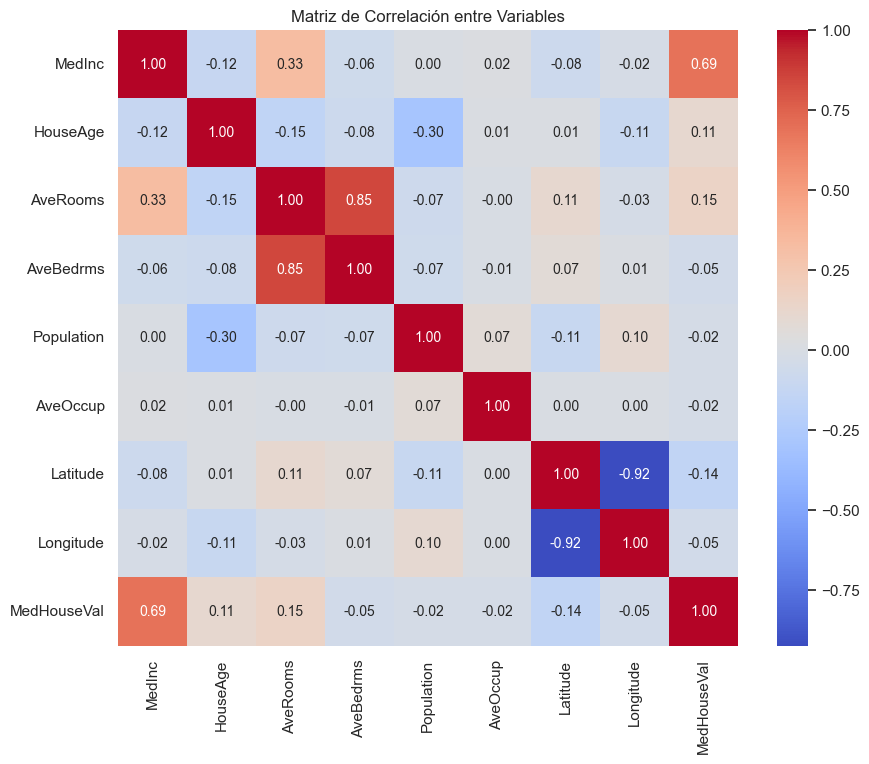

In [55]:
correlation_matrix = df_california.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, annot_kws={"size": 10}, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables")
plt.show()

Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin entrar en pruebas de hipótesis?

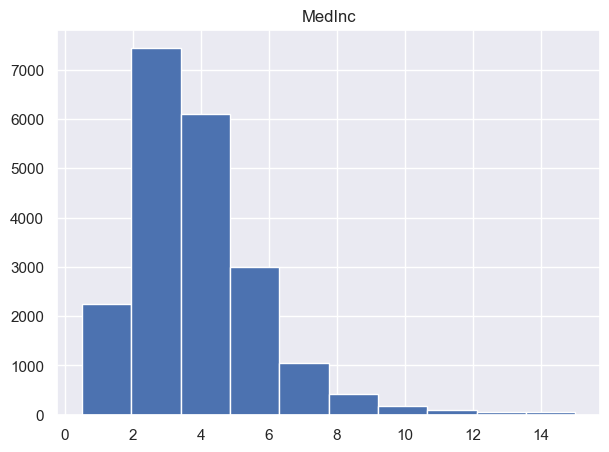

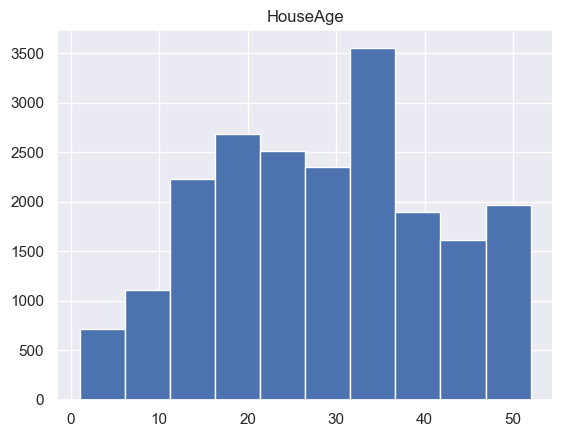

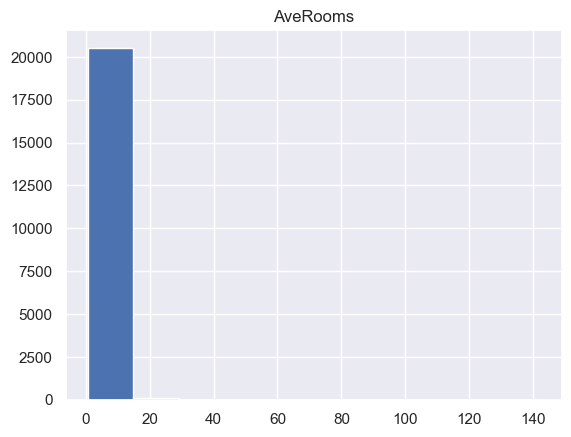

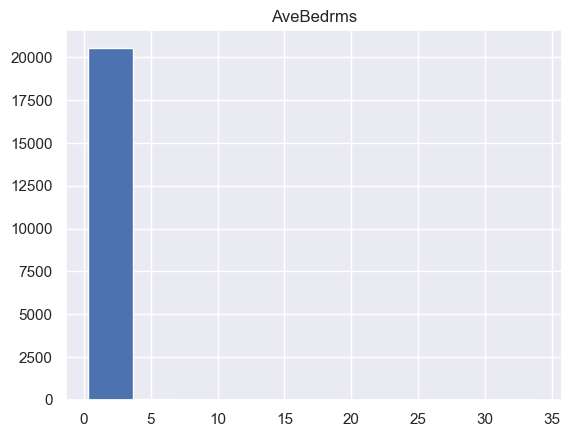

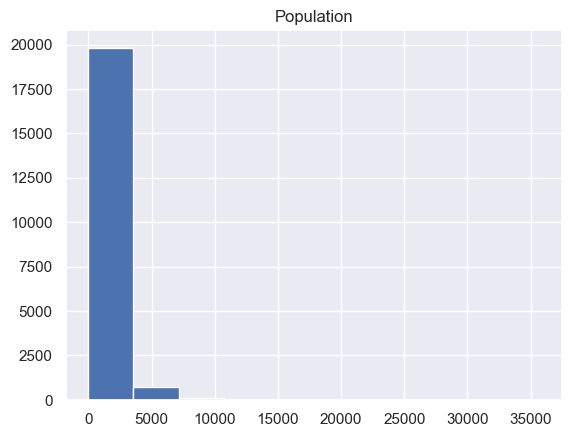

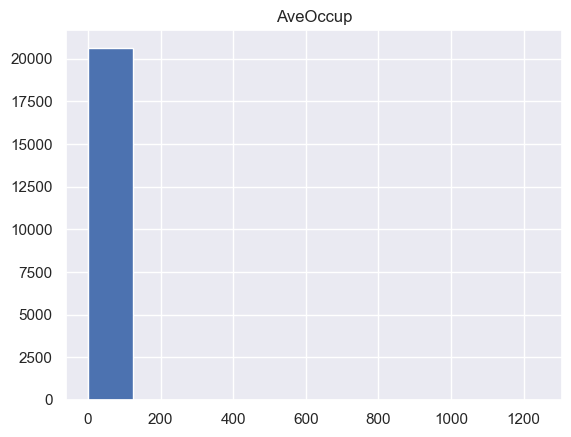

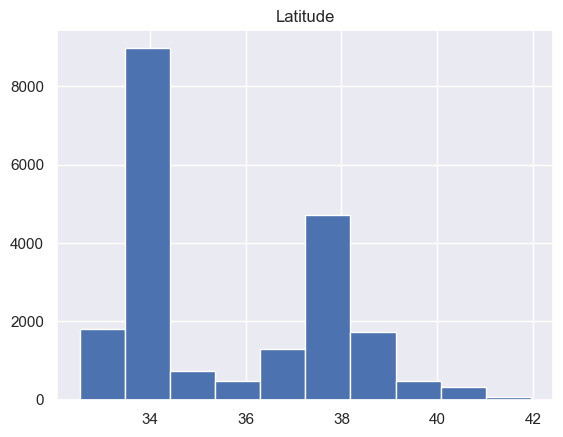

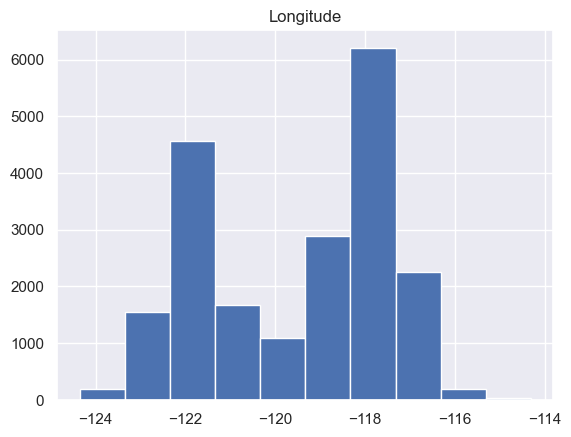

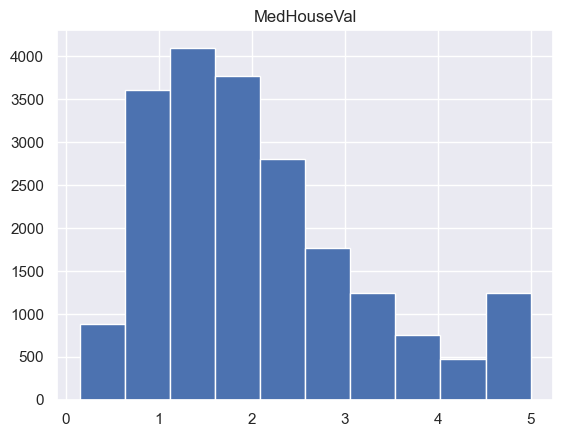

In [56]:

plt.figure(figsize=(7, 5))
#dataset.Time.hist()
for var in df_california.columns:
    df_california[var].hist()
    plt.title(var)
    plt.show()


Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su respuesta.

In [57]:
from sklearn.linear_model import LinearRegression
regresion = LinearRegression()
regresion.fit(X_train_scaled, y_train)

LinearRegression()

In [58]:
# Una vez entrenado, podemos ver diferente información del modelo:
print(f"El valor de la intersección de la recta sera {regresion.intercept_ }")
print(f"El valor del coeficiente de la recta sera {regresion.coef_ }")

print(f"El coeficiente de Pearson es {regresion.score(X_train_scaled, y_train)}")

# Calculamos el desvío estándar del modelo
std_dev_model = np.sqrt((np.sum((y_train - regresion.predict(X_train_scaled))**2))/(y_train.size-6))
print(f"Desvío estándar del modelo {std_dev_model}")
print(f"Desvío estándar del label {np.std(y_train)}")



El valor de la intersección de la recta sera 2.0692396089424165
El valor del coeficiente de la recta sera [ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]
El coeficiente de Pearson es 0.6093459727972159
Desvío estándar del modelo 0.723584867399972
Desvío estándar del label 1.157452365098417


6192
6192


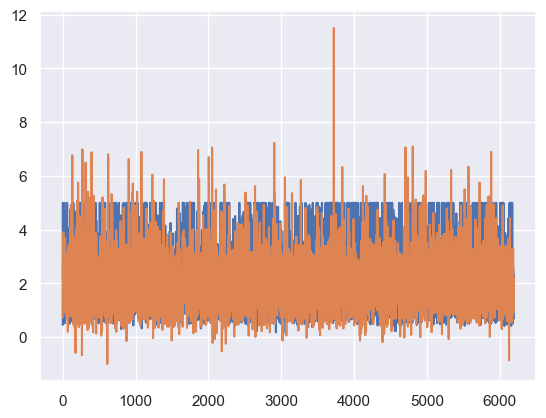

R-cuadrado en test: 0.5957702326061662
Error absoluto medio: 0.5272474538305956
Error cuadratico medio: 0.5305677824766754
Raiz de error cuadratico medio: 0.7284008391515453
Error absoluto porcentual medio: 31.75%
Error porcentual medio: -12.72%


In [59]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

#scikit-learn no tiene el error porcentual medio (MPE) lo vamos a crear nosotros

def mean_porcentual_error(yreal, ypred):

    return np.mean((yreal-ypred)/yreal)

y_pred = regresion.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
mpe = mean_porcentual_error(y_test, y_pred)

j=range(len(y_test))
plt.plot(j,y_test)
plt.plot(j,y_pred)
plt.show()

print("R-cuadrado en test:", r2)
print("Error absoluto medio:", mae)
print("Error cuadratico medio:", mse)
print("Raiz de error cuadratico medio:", rmse)
print(f"Error absoluto porcentual medio: {mape*100:.2f}%")
print(f"Error porcentual medio: {mpe*100:.2f}%")


Como se puede observar de los resultados que el modelo predice subestimando el valor del target. 

1. **R-cuadrado (0.595)**: Un R² de 0.595 indica que el modelo es capaz de explicar el 59.5% de la variabilidad en los datos de prueba. Esto sugiere que el modelo tiene una capacidad moderada para predecir el valor objetivo. Sin embargo, cerca del 40.5% de la variabilidad no es explicada por el modelo, lo cual podría indicar que hay factores importantes que el modelo no está capturando o que existe ruido en los datos.

2. **Error Absoluto Medio (MAE: 0.528)**: El MAE de 0.528 sugiere que, en promedio, las predicciones del modelo se desvían del valor real por 52800 dolares. Esto indica que, aunque el error no es excesivamente grande comparado con los 600000 dolares que es el valor medio de las casas en California, existe una desviación consistente en las predicciones que podría ser mejorada.

3. **Error Cuadrático Medio (MSE: 0.532)** y **Raíz del Error Cuadrático Medio (RMSE: 0.729)**: El MSE de 0.532 y el RMSE de 0.729 muestran que hay un margen de error notable en las predicciones, con errores más grandes penalizados más fuertemente debido al cuadrado de las diferencias. El RMSE, en particular, sugiere que las predicciones se desvían en promedio 0.729 unidades del valor real.

4. **Error Absoluto Porcentual Medio (MAPE: 31.80%)**: El MAPE del 31.8% indica que, en promedio, las predicciones están desviadas un 31.8% del valor real. Este es un error relativamente alto, lo que sugiere que el modelo tiene dificultades para hacer predicciones precisas en términos porcentuales. 

5. **Error Porcentual Medio (MPE: -12.71%)**: El MPE de -12.71% revela que, en promedio, las predicciones del modelo están sesgadas hacia valores más bajos que los reales en un 12.71%. Este sesgo negativo significa que el modelo tiende a subestimar el valor objetivo.

### **Conclusión sobre la calidad de predicción del modelo:**

- **Fortalezas**:
  - El modelo explica una parte razonable de la variabilidad en los datos (R² = 0.595), lo que sugiere que captura algunas de las relaciones subyacentes en los datos.
  
- **Debilidades**:
  - Los errores porcentuales (MAPE de 31.8% y MPE de -12.71%) son altos, lo que indica una falta de precisión y un sesgo negativo.
  - El RMSE relativamente alto (0.729) también sugiere que los errores son significativos, especialmente en los casos con errores grandes.

**En resumen**, aunque el modelo tiene una capacidad moderada para explicar los datos, la precisión de sus predicciones es cuestionable, con una tendencia a subestimar los valores y cometer errores relativamente grandes. Mejoras en el modelo podrían incluir la inclusión de más variables relevantes, ajustes en la estructura del modelo o la utilización de técnicas de regularización para reducir los errores y mejorar la precisión.

In [60]:
# Calculamos el desvío estándar del modelo
std_dev_model = np.sqrt((np.sum((y_train - regresion.predict(X_train))**2))/(y_train.size - 2))
print(f"Desvío estándar del modelo {std_dev_model}")

Desvío estándar del modelo 76.19259259267204


Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el mejor valor de α, buscando entre [0, 12.5]. Graficar el valor de MSE versus α


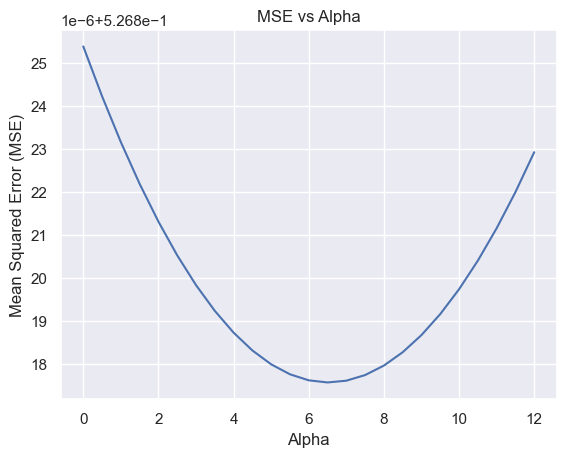

Mejor alpha encontrado: 6.5


In [61]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge()

alpha_array = np.arange(0, 12.5, 0.5)

param_grid = {'alpha': alpha_array}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train_scaled, y_train)

mean_test_scores = -grid_search.cv_results_['mean_test_score']

plt.plot(alpha_array, mean_test_scores)
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Alpha')
plt.show()

print("Mejor alpha encontrado:", grid_search.best_params_['alpha'])



In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

best_alpha = grid_search.best_params_['alpha']

ridge_best_model = Ridge(alpha=best_alpha)
ridge_best_model.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_best_model.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print(f"Resultados del mejor modelo Ridge con alpha = {best_alpha}:")
print(f"Error cuadrático medio (MSE): {mse_ridge}")
print(f"Error absoluto medio (MAE): {mae_ridge}")
print(f"Raíz de error cuadrático medio (RMSE): {rmse_ridge}")

Resultados del mejor modelo Ridge con alpha = 6.5:
Error cuadrático medio (MSE): 0.5304163922596736
Error absoluto medio (MAE): 0.5272219078037016
Raíz de error cuadrático medio (RMSE): 0.7282969121585465


Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. 
¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse 
reducido?

### Comparación de Resultados:

1. *Regresión Lineal*:
   - MSE: 0.5305677824766752
   - MAE: 0.5272474538305955
   - RMSE: 0.7284008391515452

2. *Mejor Regresión de Ridge*:
   - MSE: 0.5304163922596736
   - MAE: 0.5272219078037016
   - RMSE: 0.7282969121585465

### ¿Cuál da mejores resultados?

Los resultados entre la regresión lineal y la mejor regresión de Ridge son extremadamente cercanos. El modelo de Ridge muestra un MSE y un MAE ligeramente mejores que la regresión lineal, lo que indica que la regularización ha tenido un efecto positivo, aunque muy pequeño.

- *MSE*: Ridge es marginalmente mejor con un valor de 0.530416 frente a 0.530568 de la regresión lineal.
- *MAE*: Ridge también mejora ligeramente con un valor de 0.527222 frente a 0.527247 de la regresión lineal.
- *RMSE*: Ridge tiene un valor de 0.728297 frente a 0.728401 de la regresión lineal.

### Conjetura sobre la mejora del modelo:

Aunque la diferencia es mínima, el modelo de Ridge podría ser ligeramente mejor en términos de generalización debido a la regularización:

- *Reducción del sobreajuste*: La regularización de Ridge ayuda a prevenir el sobreajuste al penalizar los coeficientes grandes, lo que puede mejorar la estabilidad del modelo, especialmente cuando hay multicolinealidad o características redundantes.

### ¿Qué error puede haberse reducido?

La mejora en el modelo Ridge probablemente se debe a la reducción del *error de varianza*, que es el error asociado con la sensibilidad del modelo a las fluctuaciones en los datos de prueba. Ridge ayuda a estabilizar el modelo, haciéndolo más robusto frente a datos nuevos, aunque en este caso, la diferencia es pequeña.

### Conclusión:

En este caso particular, la mejora con Ridge es marginal, lo que indica que los datos no sufrían demasiado de sobreajuste o multicolinealidad.